# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import models
from keras import layers

In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [4]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
pd.isnull(data).any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [7]:
sample = data.iloc[:, :-1]
labels = data.iloc[:,-1]
print(sample.shape)
print(labels.shape)

(284807, 30)
(284807,)


In [8]:
from sklearn.model_selection import train_test_split

s_train, s_test, l_train, l_test = train_test_split(sample, labels, test_size=.3)
s_train, s_val, l_train, l_val = train_test_split(s_train, l_train, test_size=.2)

In [9]:
mean = np.mean(s_train)
std = np.std(s_train)

s_train -= mean
s_train /= std

s_val -= mean
s_val /= std

s_test -= mean
s_test /= std

In [10]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(s_train.shape[1],)))
  model.add(layers.Dense(10, activation='relu'))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(6, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [11]:
model = build_model()
history = model.fit(s_train, l_train, epochs=100, validation_data=(s_val, l_val))

Epoch 1/100
4985/4985 [==============================] - 9s 2ms/step - loss: 0.0475 - accuracy: 0.9883 - val_loss: 0.0058 - val_accuracy: 0.9994
Epoch 2/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0070 - accuracy: 0.9994 - val_loss: 0.0061 - val_accuracy: 0.9995
Epoch 3/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0062 - accuracy: 0.9994 - val_loss: 0.0055 - val_accuracy: 0.9995
Epoch 4/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0056 - accuracy: 0.9994 - val_loss: 0.0060 - val_accuracy: 0.9995
Epoch 5/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0055 - accuracy: 0.9994 - val_loss: 0.0059 - val_accuracy: 0.9995
Epoch 6/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0063 - accuracy: 0.9994 - val_loss: 0.0066 - val_accuracy: 0.9995
Epoch 7/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0059 - accuracy: 0.9994 - val_loss: 0.0047 - val_ac

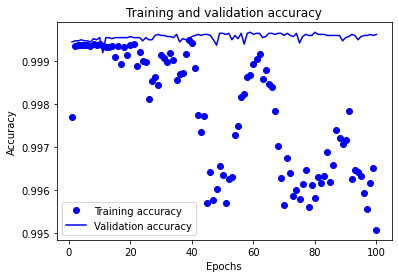

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
model = build_model()
model.fit(s_train, l_train, epochs=30, batch_size=64)

Epoch 1/30
2493/2493 [==============================] - 4s 1ms/step - loss: 0.0485 - accuracy: 0.9982
Epoch 2/30
2493/2493 [==============================] - 3s 1ms/step - loss: 0.0050 - accuracy: 0.9993
Epoch 3/30
2493/2493 [==============================] - 3s 1ms/step - loss: 0.0042 - accuracy: 0.9995
Epoch 4/30
2493/2493 [==============================] - 3s 1ms/step - loss: 0.0043 - accuracy: 0.9994
Epoch 5/30
2493/2493 [==============================] - 3s 1ms/step - loss: 0.0044 - accuracy: 0.9994
Epoch 6/30
2493/2493 [==============================] - 3s 1ms/step - loss: 0.0047 - accuracy: 0.9994
Epoch 7/30
2493/2493 [==============================] - 3s 1ms/step - loss: 0.0038 - accuracy: 0.9995
Epoch 8/30
2493/2493 [==============================] - 3s 1ms/step - loss: 0.0048 - accuracy: 0.9993
Epoch 9/30
2493/2493 [==============================] - 3s 1ms/step - loss: 0.0043 - accuracy: 0.9995
Epoch 10/30
2493/2493 [==============================] - 3s 1ms/step - loss: 0.003

In [15]:
loss, accuracy = model.evaluate(s_test, l_test)
prediction = accuracy*100
print('Prediction Accuracy =', prediction,'%')

2671/2671 [==============================] - 3s 946us/step - loss: 0.0037 - accuracy: 0.9994
Prediction Accuracy = 99.94148015975952 %
